In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

prediction of graduates admission

In [52]:
data = pd.read_csv("Admission_Predict.csv")

In [53]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [54]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [55]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [56]:
data.drop('Serial No.', axis=1, inplace = True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [57]:
column_names = ['GRE Score','TOEFL Score','CGPA','Chance of Admit ']

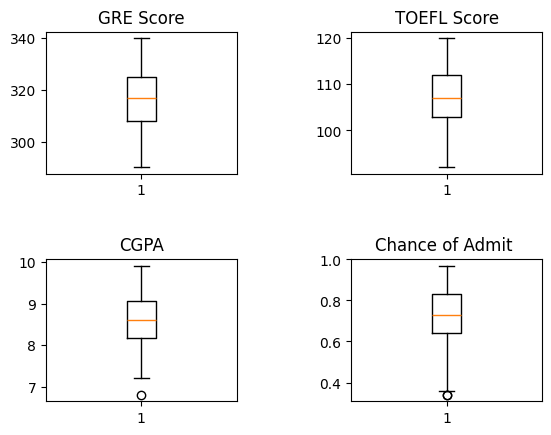

In [58]:
i=1
for col in column_names:
    plt.subplots_adjust(wspace=0.6, hspace=0.6)
    plt.subplot(2,2,i)
    i=i+1
    plt.boxplot(data[col])
    plt.title(col)

In [59]:
outliers_columns = ['CGPA','Chance of Admit ']
outliers_columns

['CGPA', 'Chance of Admit ']

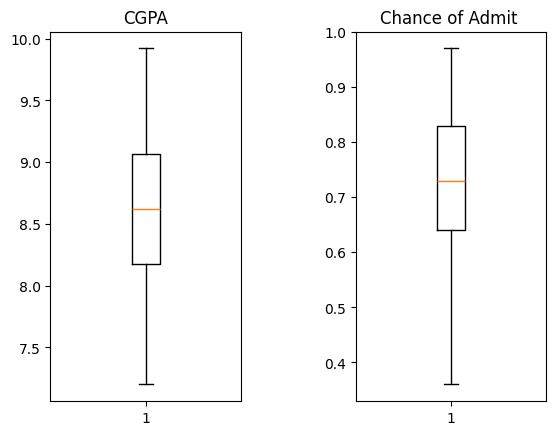

In [60]:
i = 1
for col in outliers_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3-q1
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    upper_index = np.where(data[col] >= upper)[0]
    lower_index = np.where(data[col] <= lower)[0]
    data.drop(index = upper_index, inplace = True)
    data.drop(index = lower_index, inplace = True)

    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(1,2,i)
    i+=1
    plt.boxplot(data[col])
    plt.title(col)

    data.reset_index(inplace=True)
    data.drop('index',axis=1, inplace=True)
 

#### correlation


In [61]:
correlation = data.corr()
print(correlation)

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.832714           0.665017  0.617055   
TOEFL Score         0.832714     1.000000           0.692325  0.662367   
University Rating   0.665017     0.692325           1.000000  0.737987   
SOP                 0.617055     0.662367           0.737987  1.000000   
LOR                 0.551700     0.561880           0.656381  0.731366   
CGPA                0.832176     0.827509           0.743450  0.726122   
Research            0.582542     0.490393           0.451432  0.446658   
Chance of Admit     0.799512     0.788195           0.710163  0.690864   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.551700  0.832176  0.582542          0.799512  
TOEFL Score        0.561880  0.827509  0.490393          0.788195  
University Rating  0.656381  0.743450  0.451432          0.710163  
SOP                0.731366  0.726122  0.446658          0.69

<Axes: >

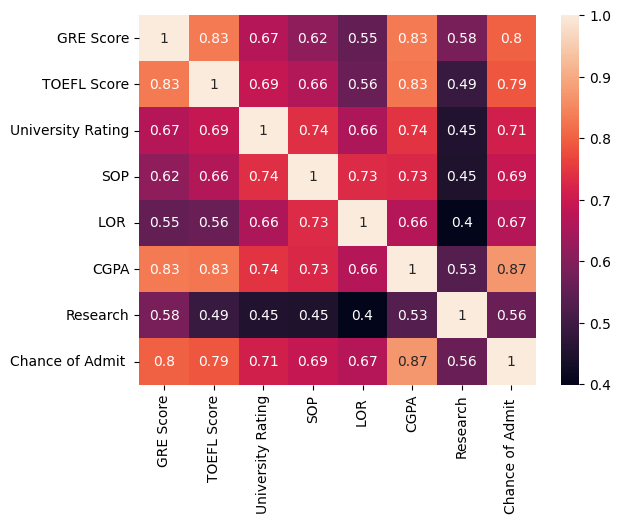

In [62]:
sns.heatmap(correlation, annot= True)

In [66]:
print(data.columns)


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


Text(0, 0.5, 'chance')

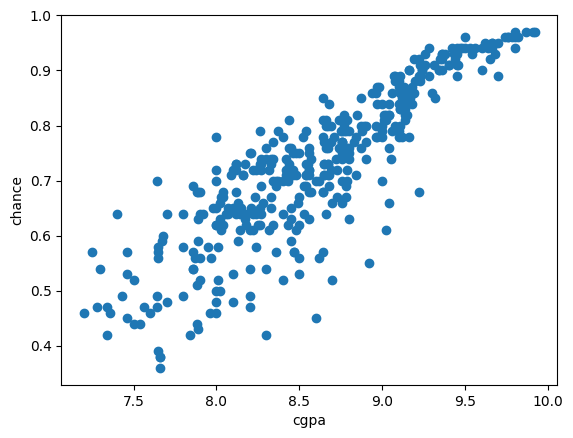

In [67]:
# Sample scatter plot showing relation between CGPA and Chance of Admit

plt.scatter(data['CGPA'], data['Chance of Admit '])
plt.xlabel('cgpa')
plt.ylabel('chance')

#### Model creation and training

In [69]:
x = data.drop('Chance of Admit ', axis = 1)
y = data['Chance of Admit ']

In [70]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
392,324,110,3,3.5,3.5,9.04,1
393,325,107,3,3.0,3.5,9.11,1
394,330,116,4,5.0,4.5,9.45,1
395,312,103,3,3.5,4.0,8.78,0


In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=120)

In [72]:
x_train.shape, x_test.shape

((317, 7), (80, 7))

In [73]:
y_train.shape, y_test.shape

((317,), (80,))

In [77]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [80]:
### performance checking

#testing score  
print(model.score(x_test,y_test))

#training score
print(model.score(x_train, y_train))

0.8003206753683427
0.8011408085850427


#### prediction

In [81]:
model.predict([[270,98,3,2,3,7.6,0]])

C:\Users\zazz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.47385521])

In [89]:
model.predict([[310,118,4,3,8,8,1]])


C:\Users\zazz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.76798783])

In [84]:
model.predict([[110,68,3,30,7,7.6,0]])


C:\Users\zazz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.30177511])

#### Saving model

In [92]:
import joblib


In [94]:

joblib.dump(model,'saved_model')

['saved_model']